In [11]:
# --- Import packages ---
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import os
from matplotlib.lines import Line2D

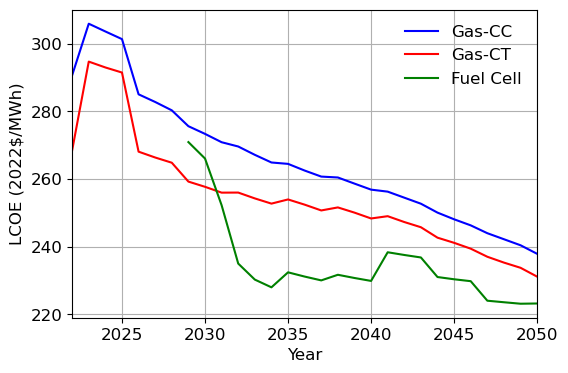

In [12]:
# --- Load file ---
folder = "Z:\\FY24-sshi-Last10pctProject\\national runs\\decarb plots"
file = "LCOE_Calculations.xlsx"
sheet = 'LCOE Calculation (h2 vs gas)'

#
techs = ['Gas-CC','Gas-CT','Fuel Cell']
colors = ['Blue','Red','Green']

# Load the workbook
workbook = openpyxl.load_workbook(os.path.join(folder,file), data_only=True, read_only=True)

# Access the defined names (named ranges)
named_ranges = workbook.defined_names 

# Access a specific named range
LCOE_range = 'LCOE_table' # Replace with the actual named range
if LCOE_range in named_ranges:
    named_range = named_ranges[LCOE_range]

    # Named range can a string in the format 'SheetName!A1:B10'
    if named_range.attr_text:
        range_reference = named_range.attr_text
        
        # Extract the sheet name and cell range
        sheet_name, cell_range = range_reference.split('!')
        sheet_name = sheet_name.replace("'", "")
        
        # Load the specific sheet
        sheet = workbook[sheet_name]
        
        # Extract data from the named range
        cells = sheet[cell_range]
        data = [[cell.value for cell in row] for row in cells]


# Convert list of lists to DataFrame
df = pd.DataFrame(data)

# Transpose the DataFrame
df = df.T

# Set the first row wit tech names as the new header
df.columns = df.iloc[0]

# Set the first colun (years) as index
df.set_index(df.columns[0], inplace=True)

# Drop first row with tech names
df = df[1:]

# Initiate plotting
plt.figure(figsize=(6,4))

# Plot each tech
for tech, color in zip(techs, colors):
    plt.plot(df.index, df[tech], linestyle='-', color=color, label=tech)

# Customize plot
plt.xlabel('Year', fontsize=12)
plt.ylabel('LCOE (2022$/MWh)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(2022,2050)
plt.grid(True)
plt.legend(frameon=False, fontsize=12)

In [18]:
# ---- Read LCOE Data ----
report = pd.read_excel('LCOE.xlsx')

# Filter year
graph_data = pd.DataFrame(pd.pivot_table(data = report.loc[report.year >= 2023], columns = 'tech', index = 'year', values = 'LCOE ($/MWh)', aggfunc = 'sum', fill_value = 0))

# Read colors for technologies and put them into a dictionary
tech_styles = pd.read_csv('tech_styles.csv')
tech_styles_dict = tech_styles.set_index(tech_styles.order)['color'].to_dict()

graph_data

tech,Fuel Cell,Fuel Cell (high fuel cost),Fuel Cell (high tech cost),"Fuel Cell (high tech cost, high fuel cost)",Fuel Cell (low tech cost),Gas-CC,Gas-CT,H2-CT
year,,,,,,,,
2023,279.623999,347.036159,279.623999,347.036159,279.623999,293.953122,275.963485,347.482813
2024,279.623999,347.036159,279.623999,347.036159,279.623999,291.683569,274.236913,345.715859
2025,279.653778,347.065938,279.653778,347.065938,279.653778,289.446046,272.735178,344.174692
2026,278.966463,346.378623,279.384904,346.797064,278.889638,286.994898,271.198608,342.597732
2027,276.904476,344.316636,279.003877,346.416037,276.418548,284.728710,269.471779,340.830514
2028,274.210305,341.622465,278.685387,346.097547,273.212335,282.258583,267.935208,339.253554
2029,270.479507,337.891667,278.340283,345.752443,268.837298,280.007694,266.223678,337.502093
2030,265.623342,333.035502,277.992694,345.404854,262.812732,277.731507,264.687108,335.925133
2031,251.828974,319.241134,277.621868,345.034028,251.524122,275.261380,262.960278,334.157915


In [19]:
# Function to get color based on partial match
def get_style(tech, styles_dict):
    for key in styles_dict:
        if key in tech:
            return styles_dict[key]
    return 'Grey'  # Default color if no match is found

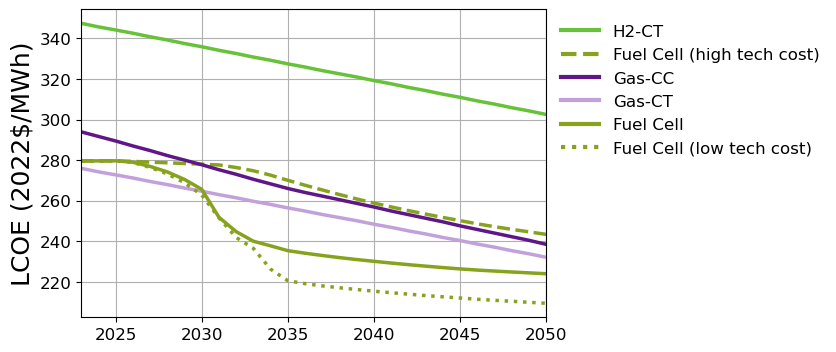

In [21]:
# --- Plot ---

# Initiate plotting
plt.figure(figsize=(6,4))

# Dictionary for line styles
techs = {  'H2-CT':'-',
           'Fuel Cell (high tech cost)':'--',
           'Gas-CC':'-',
           'Gas-CT':'-',
           'Fuel Cell':'-',
           'Fuel Cell (low tech cost)':':'}

# Plot each tech
for tech in techs:
    if 'Fuel Cell ' in tech:
        tech_styles_dict[tech] = get_style('Fuel Cell', tech_styles_dict)
    plt.plot(graph_data.index, graph_data[tech], linestyle=techs[tech], linewidth=2.5,label=tech, color=tech_styles_dict[tech])


# Customize plot
#plt.xlabel('Year', fontsize=12)
plt.ylabel('LCOE (2022$/MWh)', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(2023,2050)
plt.grid(True)

custom_lines = [Line2D([0], [0], color=tech_styles_dict[tech], linestyle=techs[tech], lw=3) for tech in techs]
plt.legend(custom_lines, list(techs.keys()), frameon=False, fontsize=12, bbox_to_anchor=(1,1), handlelength=2.3)